This is a Test
let's see some images!


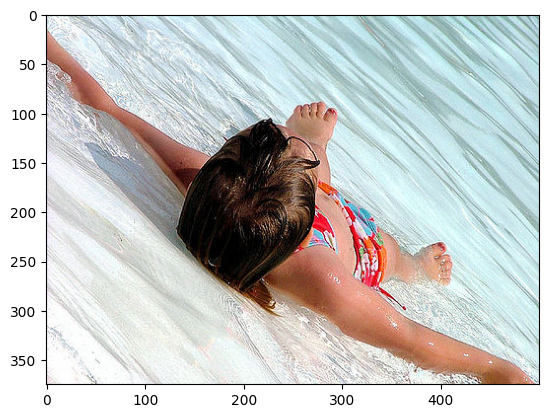

In [ ]:
import os 

print("This is a Test")

print("let's see some images!")

import matplotlib.pyplot as plt  # for plotting the images!
import matplotlib.image as mpimg # for reading the images!

# let's see if we can read and plot an image from \data\flickr8k_dataset\images 
path = r"..\data\Flickr8k_Dataset\Images\667626_18933d713e.jpg"

if os.path.exists(path):
	img = mpimg.imread(path)
	plt.imshow(img) # show the image
	plt.axis('off') # they show axis by default, let's turn them off
	plt.show() # display the image
else:
	print(f"File not found: {path}")


Loading images from: ..\data\Flickr8k_Dataset\Images


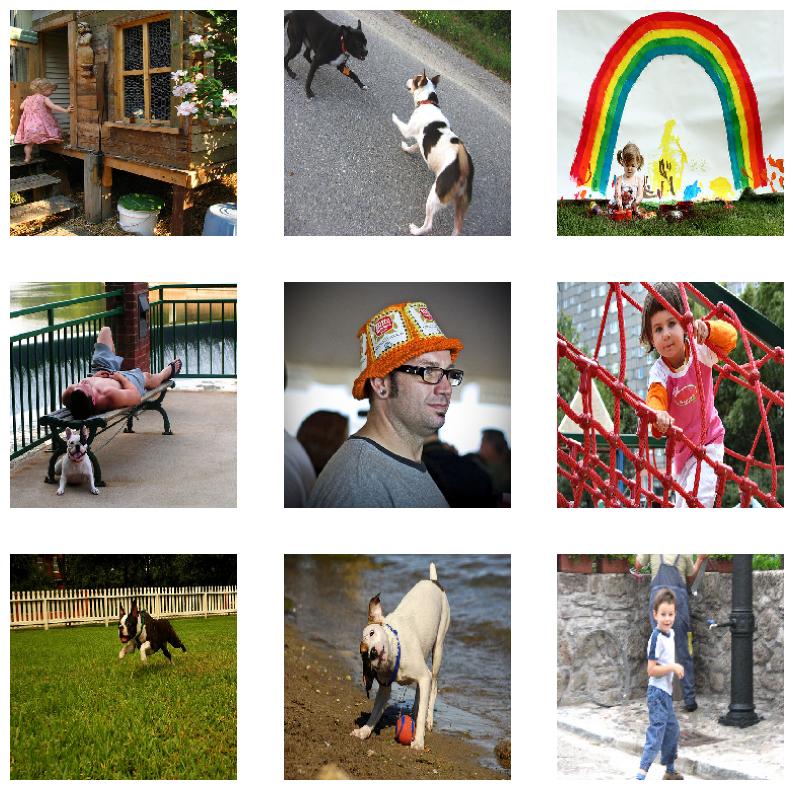

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # ImageDataGenerator for data augmentation

import matplotlib.pyplot as plt # for plotting the images!
import os # for checking if the directory exists
import glob # for finding all images in the directory
from tensorflow.keras.utils import load_img, img_to_array # for loading and converting images to arrays
import numpy as np # for numerical operations

# Create an instance of ImageDataGenerator because we will use it to load images and apply transformations
# Note: rescaling pixel values to [0, 1] is a common practice in deep learning to normalize the input data

images_path = r"..\data\Flickr8k_Dataset\Images" # Path to the images directory

if os.path.exists(images_path):
    print(f"Loading images from: {images_path}")
    # find all .jpg files in the directory
    image_files = glob.glob(os.path.join(images_path, "*.jpg")) # glob.glob returns a list of all files matching the pattern
    if len(image_files) == 0:
        print("No images found in the directory.") # not our case!
    else:
        # let's see some images!
        plt.figure(figsize=(10, 10)) # create a figure to display images
        for i, img_path in enumerate(image_files[:9]): # limit to first 9 images for display
            img = load_img(img_path, target_size=(224, 224)) # Load image and resize to 224x224
            img_array = img_to_array(img) / 255.0  # Convert image to array and rescale pixel values to [0, 1]
            plt.subplot(3, 3, i + 1) # Create a subplot for each image, the 3x3 grid since there are 9 images
            plt.imshow(img_array) # Display the image
            plt.axis('off') # Turn off axis
        plt.show() # display the images
else:
    print(f"Directory not found: {images_path}") # This will not happen, but just in case
# - ---

In [ ]:
import os
import spacy

# Carica il modello spaCy e aumenta la lunghezza massima
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 4_000_000  # ← aggiunto!

path = r"..\data\Flickr8k_text\captions.txt"

def preprocess_with_spacy(text_path):
    with open(text_path, 'r', encoding='utf-8') as file:
        text = file.read()

    doc = nlp(text.lower())

    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and not token.like_num
    ]

    return tokens

def clean_text(path):
    if os.path.exists(path):
        tokens = preprocess_with_spacy(path)
        return ' '.join(tokens)
    else:
        print("path not found")

cleaned_data = clean_text(path)
print(cleaned_data)


ValueError: [E088] Text of length 3319294 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.